# Cardiovascular Risk from Bangladesh #

In [110]:
# Importing Libraries
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from IPython.display import display

In [111]:
import pandas as pd
url_string = 'https://github.com/Bishwaprotapi/Cardiovascular-Disease-Risk-Classification-Using-Machine-Learning-Techniques/blob/main/CVD_Dataset.csv'

In [112]:
# Reading Data Into Pandas Dataframe
df = pd.read_csv('CVD_Dataset.csv')
df

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.100,1.710,23.600,86.200,125/79,248.0,78.0,111.0,...,Low,N,INTERMEDIARY,171.000,0.504,125.0,79.0,Elevated,140.0,17.930
1,F,55.0,118.700,1.690,41.600,82.500,139/70,162.0,50.0,135.0,...,High,Y,HIGH,169.000,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.510
2,M,NaN,NaN,1.830,26.900,106.700,104/77,103.0,73.0,114.0,...,High,Y,INTERMEDIARY,183.000,0.583,104.0,77.0,Normal,0.0,12.640
3,M,44.0,108.300,1.800,33.400,96.600,140/83,134.0,46.0,91.0,...,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.360
4,F,32.0,99.500,1.860,28.800,102.700,144/83,146.0,64.0,141.0,...,High,N,INTERMEDIARY,186.000,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,F,40.0,72.070,1.889,NaN,95.326,119/66,157.0,60.0,93.0,...,Moderate,Y,LOW,188.894,0.505,119.0,66.0,Normal,67.0,14.300
1525,F,78.0,85.877,1.825,24.426,112.340,102/115,241.0,84.0,NaN,...,Low,N,INTERMEDIARY,182.485,0.616,102.0,115.0,Hypertension Stage 2,127.0,14.805
1526,M,39.0,98.626,1.521,20.055,77.193,150/90,237.0,82.0,147.0,...,High,N,INTERMEDIARY,152.119,0.507,150.0,90.0,Hypertension Stage 2,125.0,18.251
1527,M,71.0,116.163,1.841,29.279,114.197,112/63,193.0,84.0,123.0,...,High,Y,INTERMEDIARY,184.059,0.620,112.0,63.0,Normal,79.0,15.316


# Data Preprocessing #
The following steps are performed on the dataset in this section:

- Dropping Redudant Columns
- Checking For Duplicated Rows
- Checking For Missing Values

In [113]:
df.head(10)

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,Low,N,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,High,Y,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,High,Y,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,High,N,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88
5,F,58.0,117.9,1.87,33.7,81.4,142/90,156.0,67.0,82.0,...,Moderate,Y,HIGH,187.0,0.435,142.0,90.0,Hypertension Stage 2,59.0,16.96
6,M,33.0,117.9,1.82,35.6,74.8,96/63,184.0,66.0,87.0,...,Low,N,INTERMEDIARY,182.0,0.411,96.0,63.0,Normal,88.0,17.60
7,M,55.0,100.1,1.74,33.1,96.6,115/73,287.0,40.0,96.0,...,Moderate,N,HIGH,174.0,0.555,115.0,73.0,Normal,217.0,18.11
8,F,37.0,110.1,1.86,31.8,92.4,107/95,177.0,68.0,70.0,...,High,N,INTERMEDIARY,186.0,0.497,NaN,95.0,Hypertension Stage 2,79.0,15.25
9,F,58.0,97.6,1.86,28.2,74.6,133/83,281.0,68.0,126.0,...,Moderate,N,INTERMEDIARY,186.0,0.401,133.0,83.0,Hypertension Stage 1,183.0,17.91


In [114]:
df.tail(10)

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
1519,F,53.0,101.530,1.727,35.423,110.121,143/67,174.0,38.0,161.0,...,High,Y,HIGH,172.657,0.638,143.0,67.0,Hypertension Stage 2,106.0,19.715
1520,M,29.0,89.388,1.716,26.208,78.400,165/72,223.0,49.0,94.0,...,Low,N,LOW,171.635,0.457,165.0,72.0,Hypertension Stage 2,144.0,19.952
1521,F,48.0,116.299,1.665,23.504,107.219,97/74,216.0,82.0,168.0,...,Moderate,N,LOW,166.474,0.644,97.0,74.0,Normal,104.0,15.871
1522,F,41.0,117.365,1.748,38.310,118.246,105/87,200.0,35.0,87.0,...,High,N,INTERMEDIARY,174.814,0.676,105.0,87.0,Hypertension Stage 1,135.0,18.912
1523,M,63.0,91.625,1.702,35.278,NaN,162/60,189.0,76.0,153.0,...,Moderate,N,INTERMEDIARY,NaN,0.601,162.0,60.0,Hypertension Stage 2,83.0,20.936
1524,F,40.0,72.070,1.889,NaN,95.326,119/66,157.0,60.0,93.0,...,Moderate,Y,LOW,188.894,0.505,119.0,66.0,Normal,67.0,14.300
1525,F,78.0,85.877,1.825,24.426,112.340,102/115,241.0,84.0,NaN,...,Low,N,INTERMEDIARY,182.485,0.616,102.0,115.0,Hypertension Stage 2,127.0,14.805
1526,M,39.0,98.626,1.521,20.055,77.193,150/90,237.0,82.0,147.0,...,High,N,INTERMEDIARY,152.119,0.507,150.0,90.0,Hypertension Stage 2,125.0,18.251
1527,M,71.0,116.163,1.841,29.279,114.197,112/63,193.0,84.0,123.0,...,High,Y,INTERMEDIARY,184.059,0.620,112.0,63.0,Normal,79.0,15.316
1528,F,78.0,111.627,1.867,22.017,97.692,134/67,218.0,68.0,166.0,...,High,N,HIGH,186.735,0.523,134.0,67.0,Hypertension Stage 1,120.0,15.463


In [115]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 22
Number of Instances In Dataset :  1529


In [116]:
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,Low,N,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,High,Y,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,High,Y,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,High,N,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1451 non-null   float64
 2   Weight (kg)                   1448 non-null   float64
 3   Height (m)                    1462 non-null   float64
 4   BMI                           1465 non-null   float64
 5   Abdominal Circumference (cm)  1462 non-null   float64
 6   Blood Pressure (mmHg)         1529 non-null   object 
 7   Total Cholesterol (mg/dL)     1456 non-null   float64
 8   HDL (mg/dL)                   1449 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1462 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam

In [118]:
df.describe()

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1451.000000,1448.000000,1462.000000,1465.000000,1462.000000,1456.000000,1449.000000,1462.000000,1455.000000,1450.000000,1458.000000,1447.000000,1460.000000,1459.000000
mean,47.025500,85.917427,1.754111,28.465997,91.773214,198.539148,56.197378,117.485636,175.390600,0.525727,125.627572,82.917761,111.550685,16.960925
std,12.421063,21.012580,0.113090,7.038685,12.823573,57.794099,16.066754,30.289174,11.251527,0.081213,22.112099,14.731277,58.866220,2.436192
min,25.000000,50.100000,1.502000,15.000000,70.000000,100.000000,30.000000,70.000000,150.000000,0.360000,90.000000,60.000000,-18.000000,10.530000
25%,37.000000,67.050000,1.660000,22.629000,80.500000,150.000000,42.000000,92.000000,166.000000,0.460000,107.000000,71.000000,61.000000,15.205000
50%,46.000000,86.614500,1.755000,28.159000,91.600000,197.000000,56.000000,115.000000,175.694000,0.522000,125.000000,82.000000,109.000000,16.880000
75%,55.000000,105.000000,1.845500,34.000000,102.269000,249.000000,70.000000,138.000000,184.208500,0.583750,141.000000,93.000000,159.000000,18.630000
max,79.000000,120.000000,2.000000,46.200000,119.996000,300.000000,89.000000,198.000000,199.960000,0.787000,179.000000,119.000000,237.000000,24.170000


In [119]:
df.isnull()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1525,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1526,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [120]:
df.isnull().sum()

Sex                              0
Age                             78
Weight (kg)                     81
Height (m)                      67
BMI                             64
Abdominal Circumference (cm)    67
Blood Pressure (mmHg)            0
Total Cholesterol (mg/dL)       73
HDL (mg/dL)                     80
Fasting Blood Sugar (mg/dL)     67
Smoking Status                   0
Diabetes Status                  0
Physical Activity Level          0
Family History of CVD            0
CVD Risk Level                   0
Height (cm)                     74
Waist-to-Height Ratio           79
Systolic BP                     71
Diastolic BP                    82
Blood Pressure Category          0
Estimated LDL (mg/dL)           69
CVD Risk Score                  70
dtype: int64

In [121]:
df.drop_duplicates(inplace=True)

In [122]:
df.isnull().sum()

Sex                              0
Age                             78
Weight (kg)                     81
Height (m)                      67
BMI                             64
Abdominal Circumference (cm)    67
Blood Pressure (mmHg)            0
Total Cholesterol (mg/dL)       73
HDL (mg/dL)                     80
Fasting Blood Sugar (mg/dL)     67
Smoking Status                   0
Diabetes Status                  0
Physical Activity Level          0
Family History of CVD            0
CVD Risk Level                   0
Height (cm)                     74
Waist-to-Height Ratio           79
Systolic BP                     71
Diastolic BP                    82
Blood Pressure Category          0
Estimated LDL (mg/dL)           69
CVD Risk Score                  70
dtype: int64

In [123]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1451 non-null   float64
 2   Weight (kg)                   1448 non-null   float64
 3   Height (m)                    1462 non-null   float64
 4   BMI                           1465 non-null   float64
 5   Abdominal Circumference (cm)  1462 non-null   float64
 6   Blood Pressure (mmHg)         1529 non-null   object 
 7   Total Cholesterol (mg/dL)     1456 non-null   float64
 8   HDL (mg/dL)                   1449 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1462 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam

np.int64(0)

In [124]:
df.isna().sum()

Sex                              0
Age                             78
Weight (kg)                     81
Height (m)                      67
BMI                             64
Abdominal Circumference (cm)    67
Blood Pressure (mmHg)            0
Total Cholesterol (mg/dL)       73
HDL (mg/dL)                     80
Fasting Blood Sugar (mg/dL)     67
Smoking Status                   0
Diabetes Status                  0
Physical Activity Level          0
Family History of CVD            0
CVD Risk Level                   0
Height (cm)                     74
Waist-to-Height Ratio           79
Systolic BP                     71
Diastolic BP                    82
Blood Pressure Category          0
Estimated LDL (mg/dL)           69
CVD Risk Score                  70
dtype: int64

# Exploratry Data Analysis #

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

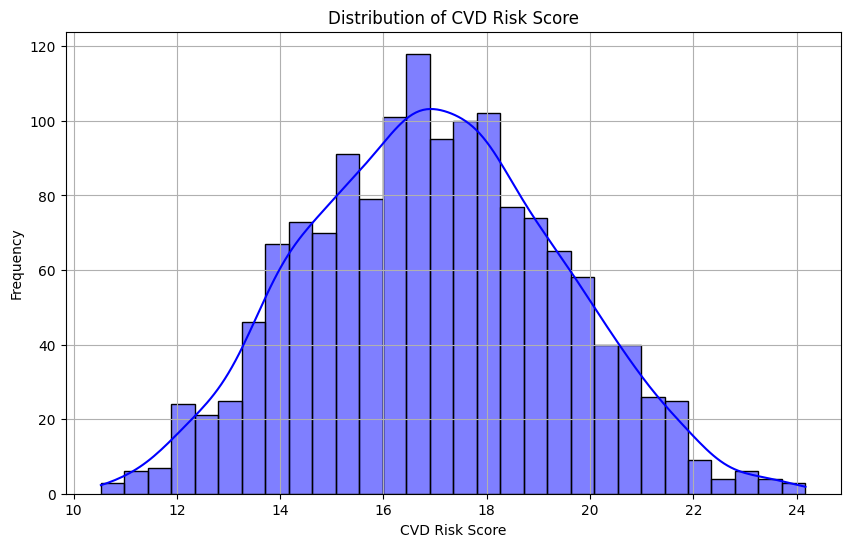

In [126]:
# Plotting the distribution of CVD Risk Score
plt.figure(figsize=(10, 6))
sns.histplot(df['CVD Risk Score'], bins=30, kde=True, color='blue')
plt.title('Distribution of CVD Risk Score')
plt.xlabel('CVD Risk Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


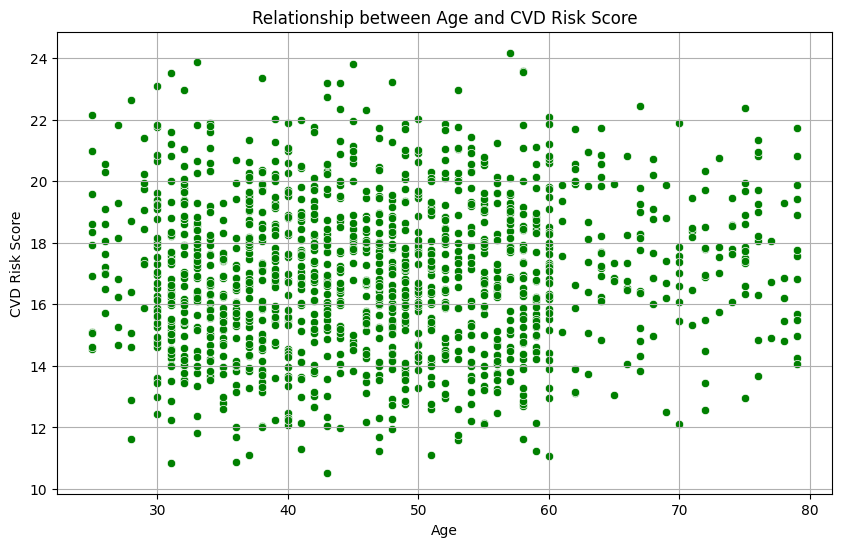

In [127]:
# Analyzing the relationship between Age and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='CVD Risk Score', data=df, color='green')
plt.title('Relationship between Age and CVD Risk Score')
plt.xlabel('Age')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

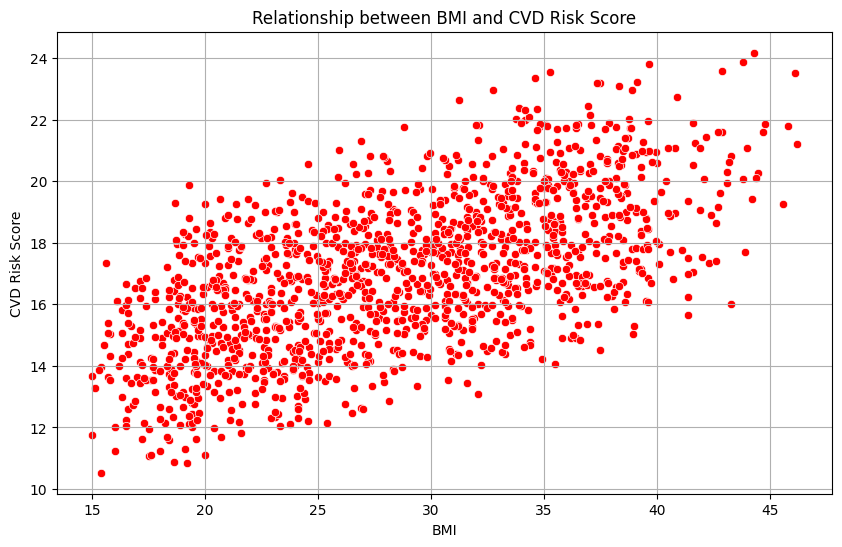

In [128]:
# Analyzing the relationship between BMI and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='CVD Risk Score', data=df, color='red')
plt.title('Relationship between BMI and CVD Risk Score')
plt.xlabel('BMI')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

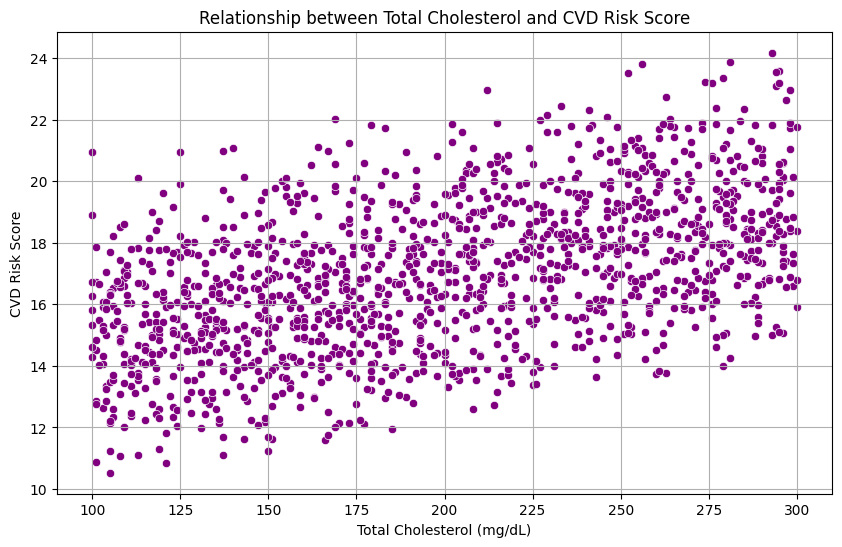

In [129]:
# Analyzing the relationship between Total Cholesterol and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Cholesterol (mg/dL)', y='CVD Risk Score', data=df, color='purple')
plt.title('Relationship between Total Cholesterol and CVD Risk Score')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

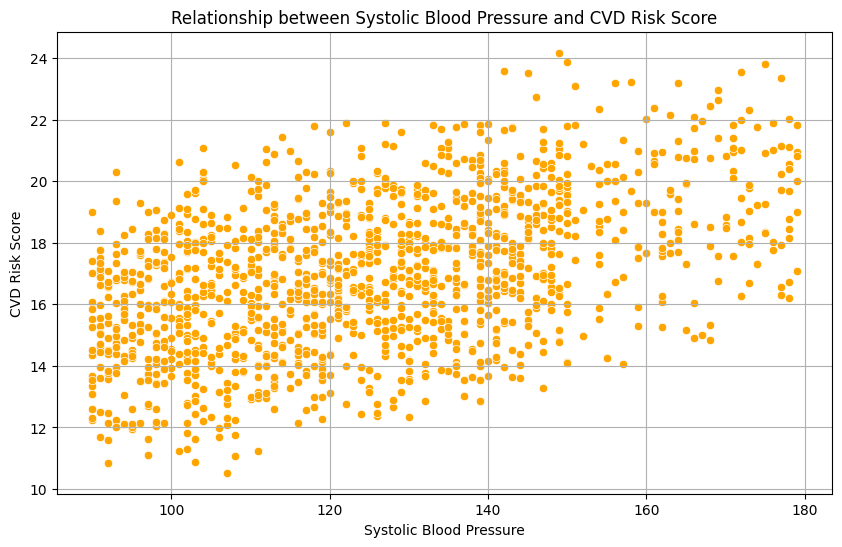

In [130]:
# Analyzing the relationship between Blood Pressure and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Systolic BP', y='CVD Risk Score', data=df, color='orange')
plt.title('Relationship between Systolic Blood Pressure and CVD Risk Score')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()


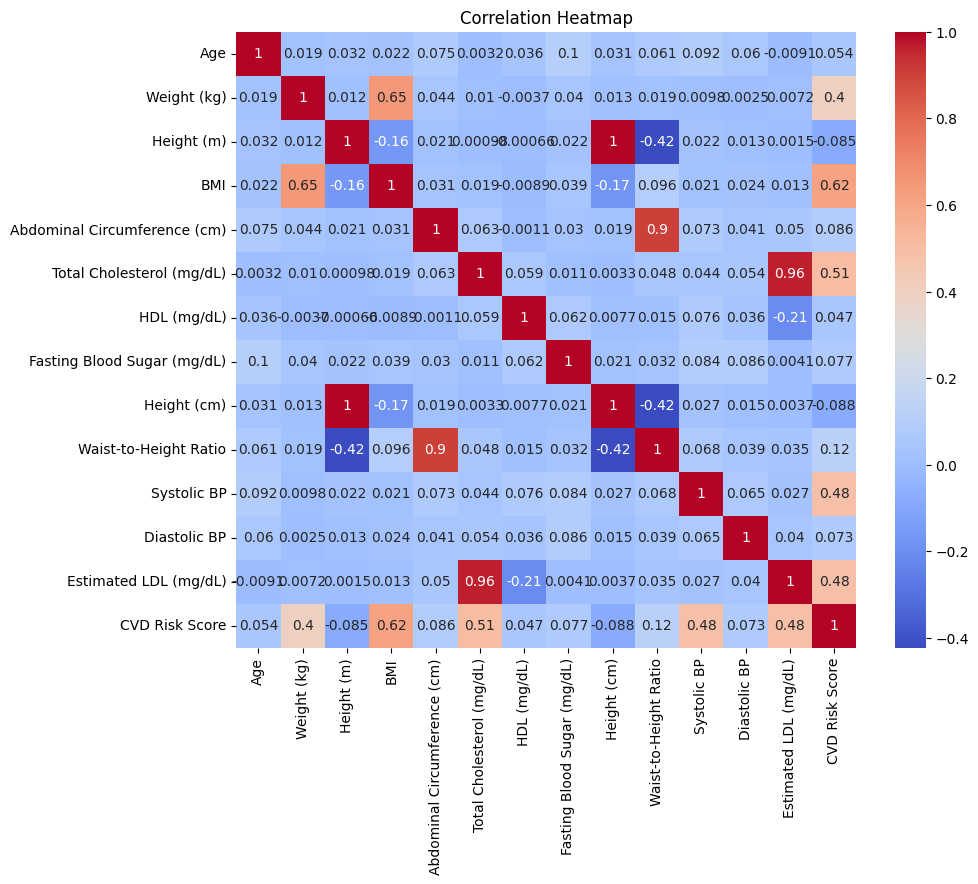

In [131]:
# Correlation Heatmap
df_numeric = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


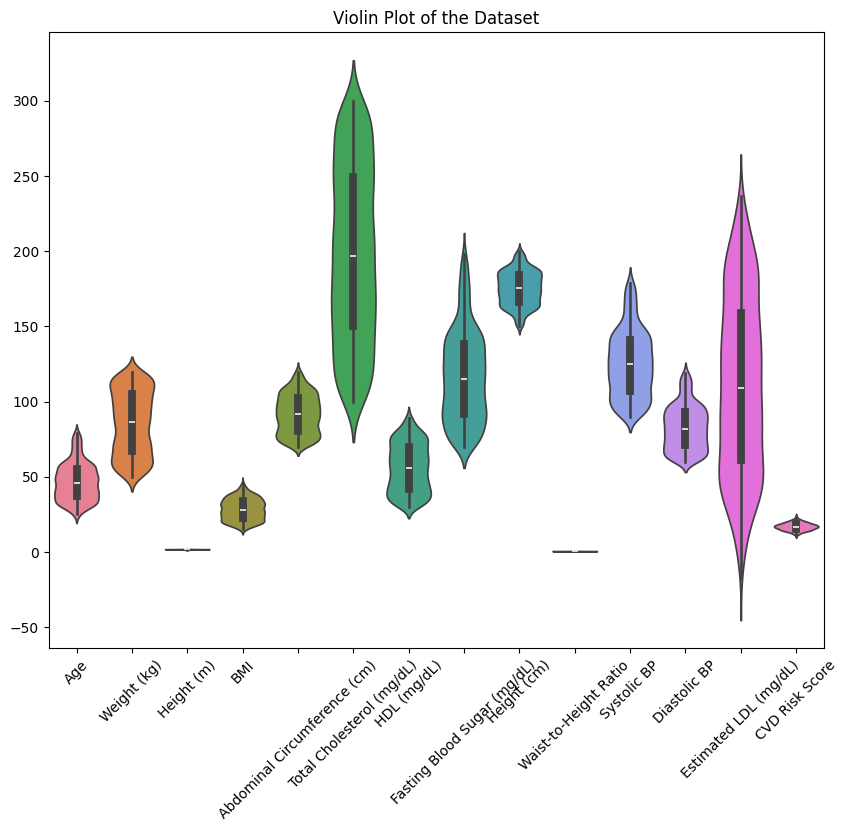

In [132]:
# Violin Plot of the Dataset
plt.figure(figsize=(10, 8))
sns.violinplot(data=df)
plt.title('Violin Plot of the Dataset')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x800 with 0 Axes>

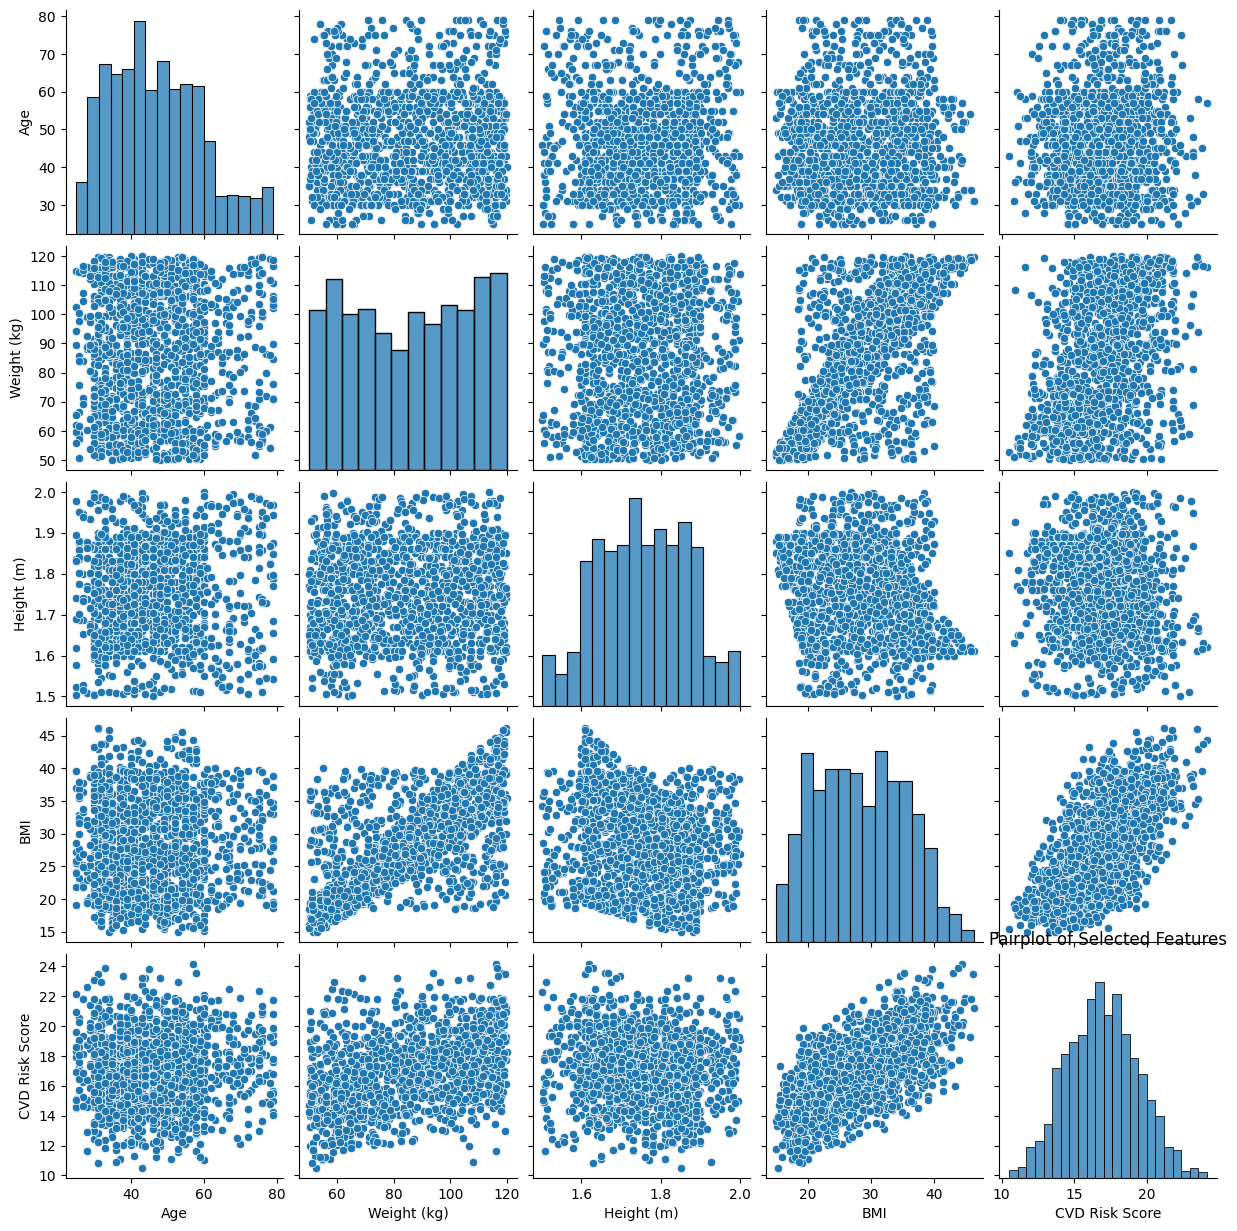

In [133]:
# Pairplot of Selected Features
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'CVD Risk Score']], markers=['o', 's', 'D'])
plt.title('Pairplot of Selected Features')
plt.show()



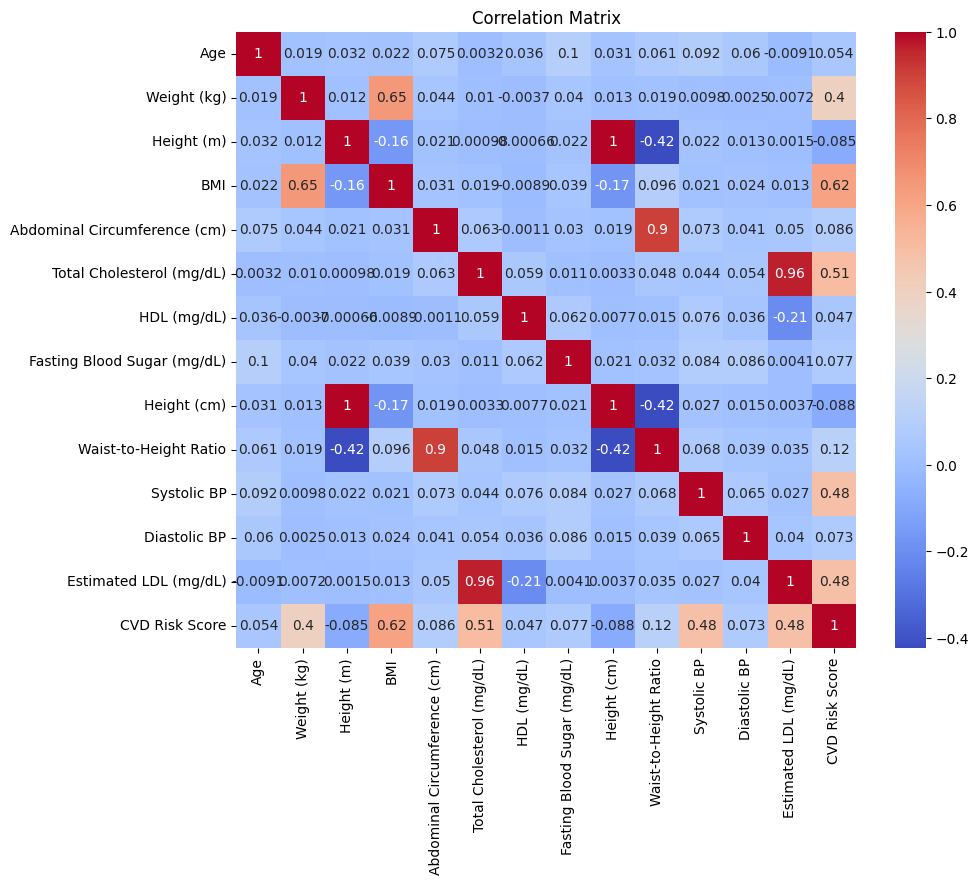

In [146]:
# Heatmap for correlation matrix
# Convert non-numeric columns to numeric before calculating correlation
df_numeric = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

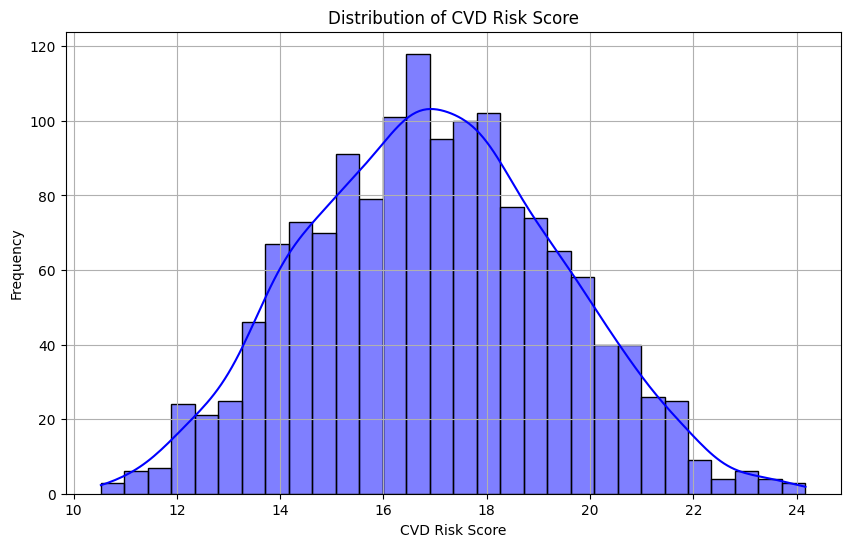

In [147]:
# Distribution of CVD Risk Score
plt.figure(figsize=(10, 6))
sns.histplot(df['CVD Risk Score'], bins=30, kde=True, color='blue')
plt.title('Distribution of CVD Risk Score')
plt.xlabel('CVD Risk Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

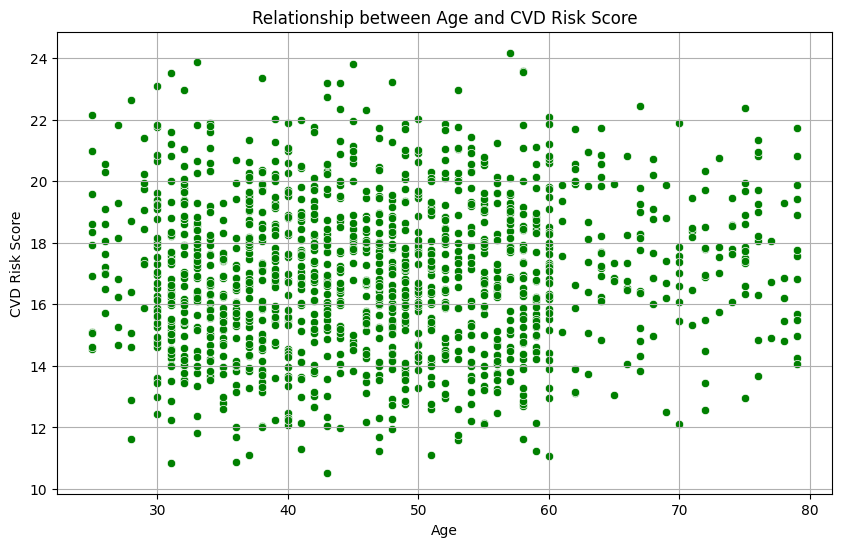

In [148]:
# Relationship between Age and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='CVD Risk Score', data=df, color='green')
plt.title('Relationship between Age and CVD Risk Score')
plt.xlabel('Age')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

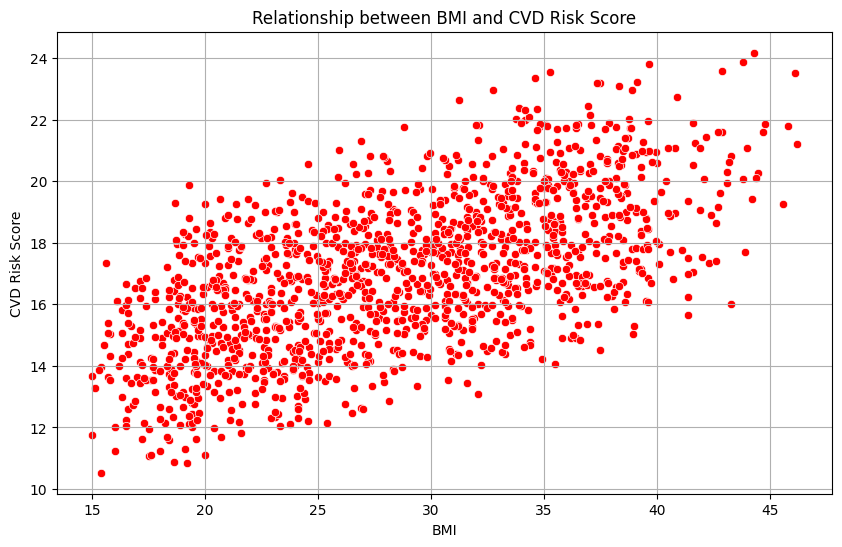

In [149]:
# Relationship between BMI and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='CVD Risk Score', data=df, color='red')
plt.title('Relationship between BMI and CVD Risk Score')
plt.xlabel('BMI')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

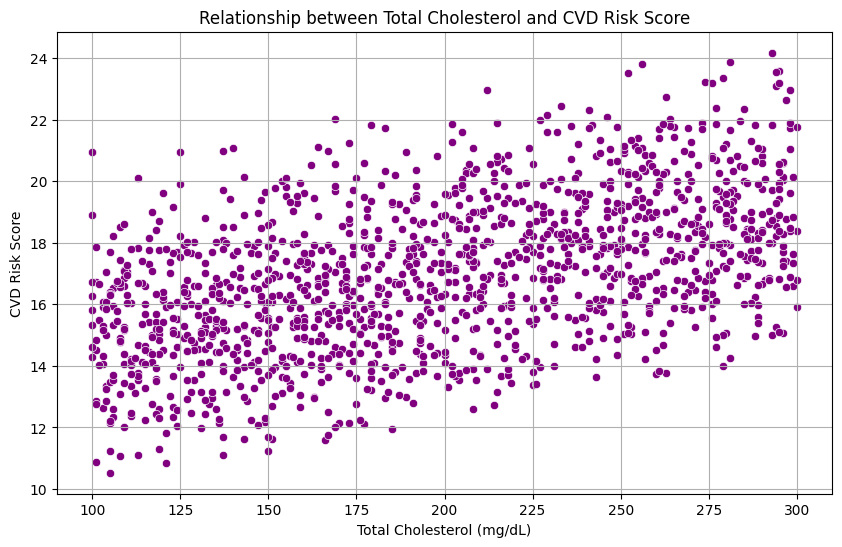

In [150]:
# Relationship between Total Cholesterol and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Cholesterol (mg/dL)', y='CVD Risk Score', data=df, color='purple')
plt.title('Relationship between Total Cholesterol and CVD Risk Score')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

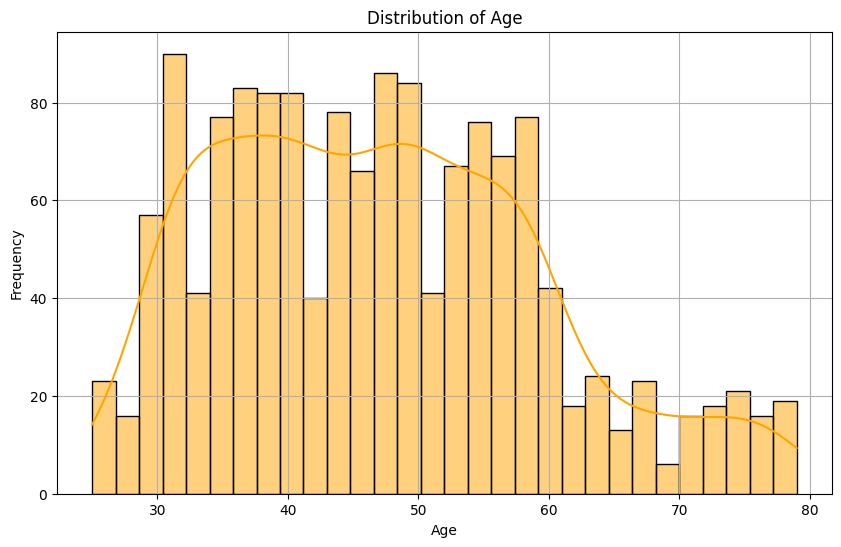

In [151]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='orange')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

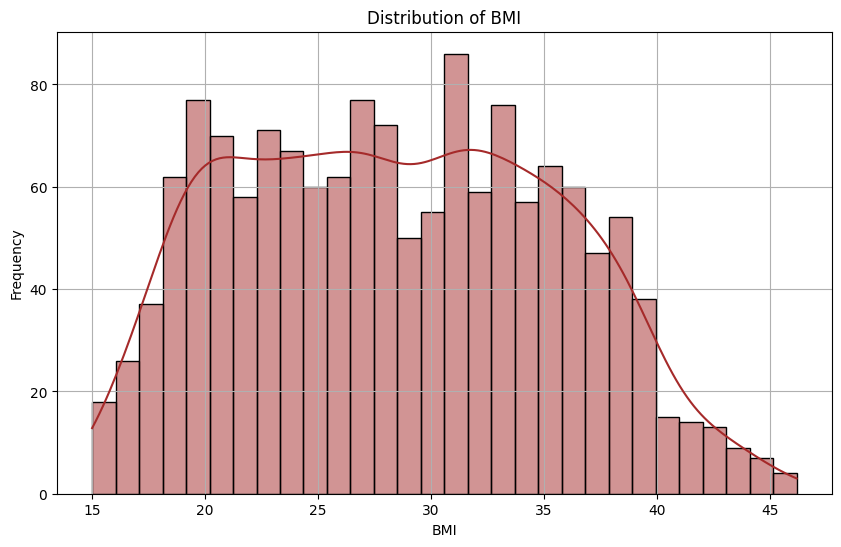

In [152]:
# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True, color='brown')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

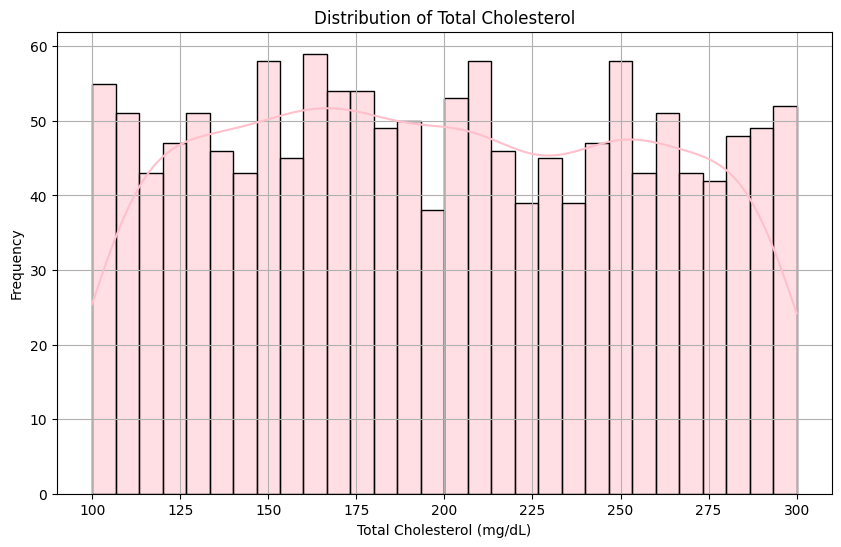

In [153]:
# Distribution of Total Cholesterol
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Cholesterol (mg/dL)'], bins=30, kde=True, color='pink')
plt.title('Distribution of Total Cholesterol')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

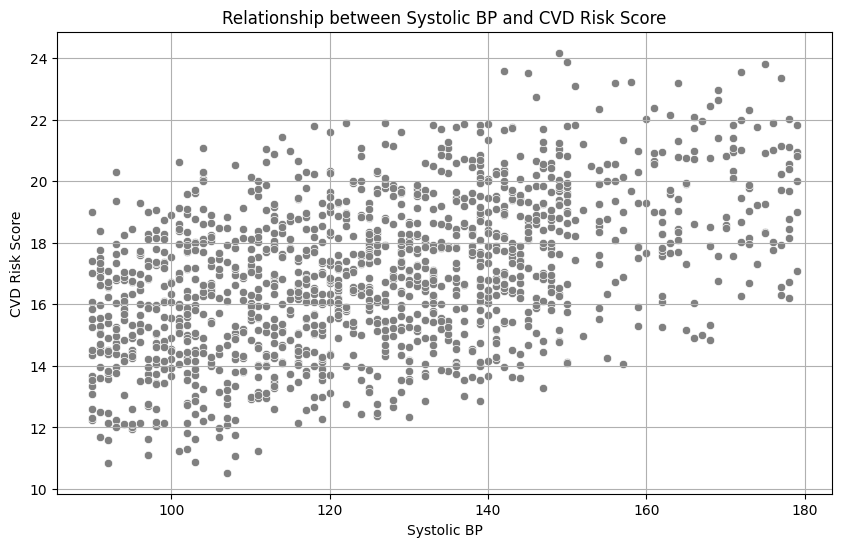

In [154]:
# Relationship between Systolic BP and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Systolic BP', y='CVD Risk Score', data=df, color='gray')
plt.title('Relationship between Systolic BP and CVD Risk Score')
plt.xlabel('Systolic BP')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

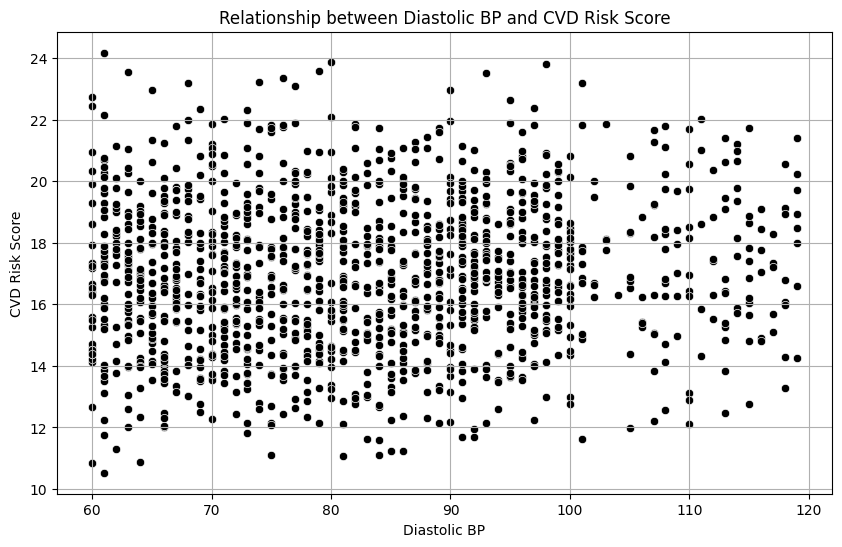

In [155]:
# Relationship between Diastolic BP and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diastolic BP', y='CVD Risk Score', data=df, color='black')
plt.title('Relationship between Diastolic BP and CVD Risk Score')
plt.xlabel('Diastolic BP')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

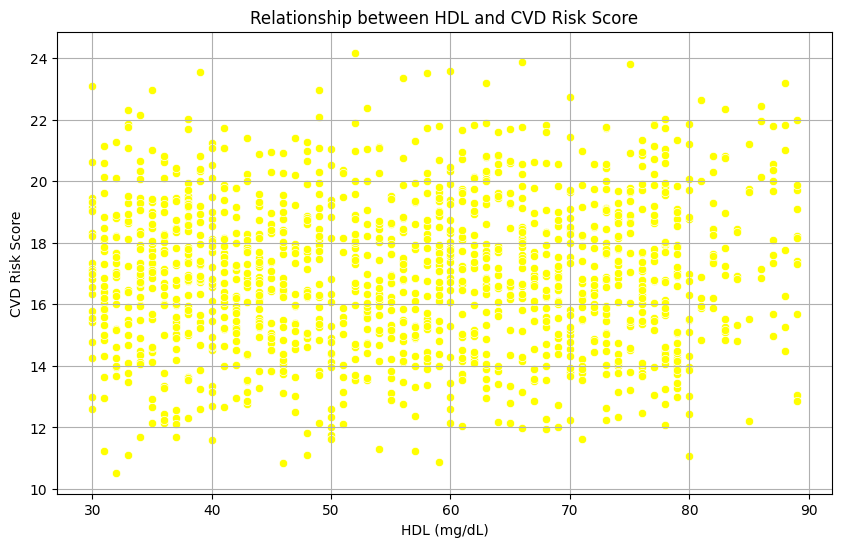

In [156]:
# Relationship between HDL and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HDL (mg/dL)', y='CVD Risk Score', data=df, color='yellow')
plt.title('Relationship between HDL and CVD Risk Score')
plt.xlabel('HDL (mg/dL)')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

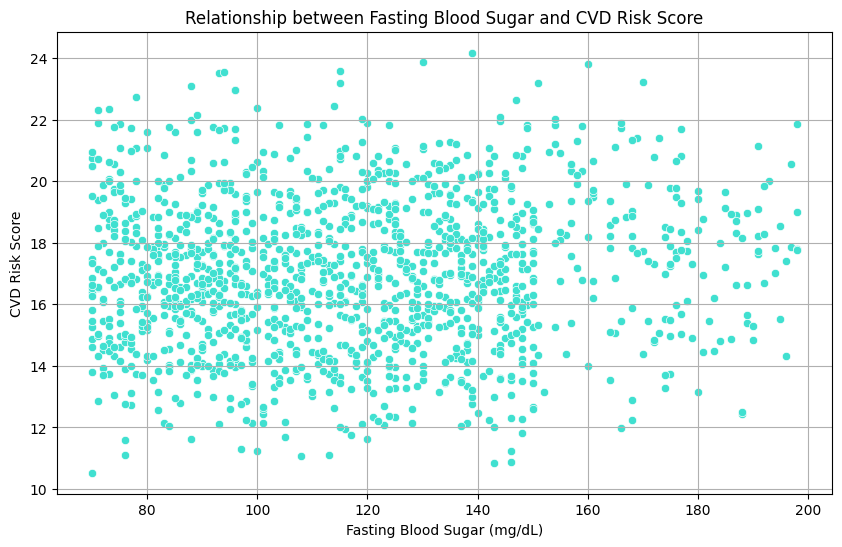

In [157]:
# Relationship between Fasting Blood Sugar and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fasting Blood Sugar (mg/dL)', y='CVD Risk Score', data=df, color='turquoise')
plt.title('Relationship between Fasting Blood Sugar and CVD Risk Score')
plt.xlabel('Fasting Blood Sugar (mg/dL)')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

### Balancing Dataset ###

In [134]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [135]:
# Split the dataset into features and target
X = df.drop('CVD Risk Level', axis=1)
y = df['CVD Risk Level']

In [136]:
# Convert categorical variables to numerical variables
X = pd.get_dummies(X, drop_first=True)

In [137]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [139]:
# Initialize the SMOTE object
smote = SMOTE(random_state=42)

In [140]:
# Oversample the minority class
X_res, y_res = smote.fit_resample(X_train_imputed, y_train)

In [141]:
# Initialize the StandardScaler object
scaler = StandardScaler()

In [142]:
# Scale the features
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test_imputed)

In [143]:
df.columns

Index(['Sex', 'Age', 'Weight (kg)', 'Height (m)', 'BMI',
       'Abdominal Circumference (cm)', 'Blood Pressure (mmHg)',
       'Total Cholesterol (mg/dL)', 'HDL (mg/dL)',
       'Fasting Blood Sugar (mg/dL)', 'Smoking Status', 'Diabetes Status',
       'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level',
       'Height (cm)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP',
       'Blood Pressure Category', 'Estimated LDL (mg/dL)', 'CVD Risk Score'],
      dtype='object')

## Machine Learning Model Training #
In this section, we have trained and evaluated the following Machine Learning Models to predict Parkinson's disease diagnosis:

- Decision Tree Classifier: This model is simple to implement and interpret, but can be prone to overfitting.
- Random Forest Classifier: This ensemble model combines multiple decision trees to improve accuracy and reduce overfitting.
- Logistic Regression: This linear model is suitable for binary classification problems and provides interpretable coefficients.
- SVM (Support Vector Machine): This model is effective in high-dimensional spaces and can handle non-linear relationships.
- Naive Bayes: This family of probabilistic models is simple to implement and can handle categorical features.
- KNN Classifier: This model is based on the idea that similar instances should have similar labels.
- XGBoost Classifier: This gradient boosting model is known for its high accuracy and speed in handling large datasets.